# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

This year we will be using an autograding script to check your model performance on a hidden test set. To do this, we need you to provide your model definition and your model weights along with your assignment submission.

Instructions on the additional files you need to submit are provided below. Please make sure to test your submitted files before submitting them, failure in loading these files may result in a grade of 0 in the results section of the assignment.

# 📑 **Autograding**

This assignment uses an autograding script to **evaluate your model performance on a hidden test set**. You must provide your model definition and model weights along with your assignment submission to ensure compatibility with the autograding system.

---

## 📁 **Required Files for Submission**

You need to submit the following **four files** in addition to the **HTML file** as previously instructed. Make sure to replace `your_name_connected_by_underscore` and `your_student_id` with your actual name and student ID, respectively:

1. **RNN Model Definition:** `A4-RNN-your_name_connected_by_underscore-your_student_id.py`
2. **RNN Model Weights:** `A4-RNN-your_name_connected_by_underscore-your_student_id.pth`
3. **BERT Model Definition:** `A4-BERT-your_name_connected_by_underscore-your_student_id.py`
4. **BERT Model Weights:** `A4-BERT-your_name_connected_by_underscore-your_student_id.pth`

---

## 🧑‍💻 **Model Definition Files (`.py`)**

### 📝 **Steps to Complete:**

1. **Copy Model Definition Code:** Copy the complete model definition code from your `A4.ipynb` notebook into the provided template files (`.py`).
2. **Complete the TODOs:** Make sure all TODOs in the files are properly completed:
   - Define your model class (`SentimentRNN` or `SentimentClassifier`).
   - Implement the `prepare_model()` function with the exact hyperparameters used during training.
   - Ensure preprocessing steps match those in your notebook.
   - Set the `EMBEDDINGS_TYPE` parameter appropriately (`'pooled'` or `'last_hidden_state'` for BERT).
3. **Command-Line Usability:** Ensure the script accepts a file path as an argument and runs from the command line as described in the file headers.

---

### 💻 **Example Command-Line Usage**

```bash
python A4-RNN-your_name_connected_by_underscore-your_student_id.py /path/to/test_dataset.csv
```
---


## 💾 **Model Weights Files (`.pth`)**

1. **Save Model Weights:** During training, save your model's best-performing weights using the `torch.save()` method.
2. **Naming Convention:** Ensure the `.pth` file names match the `.py` file names exactly, except for the file extension.
3. **Example Code for Saving Weights:**

```python
torch.save(model.state_dict(), 'A4-RNN-your_name_connected_by_underscore-your_student_id.pth')
```
---

## ✅ **Testing Your Submission: Autograder Compatibility**

You will be provided with an **"Example Test IMDB Dataset.csv"** that you can use to test your autograding file compatibility. Please follow the example command line usage to provide the test data to test the script for each of the two `.py` scripts you are submitting.

### 🧪 **How to Test:**

1. **Run the Test Notebook:** Open and run the `test_your_submitted_files.ipynb` notebook.
2. **Verify Output:** Ensure the notebook can:
   - Load your `.py` model definition files.
   - Load your `.pth` model weights files.
   - Run predictions correctly using the provided **Example Test IMDB Dataset.csv**.
3. **Debug as Needed:** If any step fails, debug the issue and retest before submission (You can ask for help on Piazza!).

---

### 🚦 **Autograder Sentinel Lines**

Make sure your scripts output predictions between the sentinel lines **exactly** as shown below:

```text
===start_output===
0
1
0
1
...
===end_output===
```

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [ ]:
# TO BE COMPLETED

# http://https://colab.research.google.com/github/Fulankeee/MIE1517-Project-4/blob/main/A4.ipynb#scrollTo=rk7aDAaR2_wz

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [1]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [ ]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [ ]:
# TO BE COMPLETED
df.head()

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative


In [ ]:
positive_review = df[df['sentiment']=='positive']
negative_review = df[df['sentiment']=='negative']

In [ ]:
positive_review.iloc[0]['review']

"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended th

In [ ]:
negative_review.iloc[0]['review']

"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies."

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Positive Review:
The positive review is detailed and covers multiple aspects of the event, but it also contains criticisms, such as calling the main event "terrible."
This mixed sentiment can be challenging for sentiment analysis models, as they may struggle to classify the review correctly.
The review includes subjective phrases and domain-specific references to wrestling, which require contextual understanding.

Negative Review:
The negative review highlights issues with the movie's plot and logic, but it also includes a small positive remark as well.
Since the review lacks an explicit sentiment score, it may require additional processing to quantify its negativity accurately.
Handling sarcasm, fixing formatting issues, and addressing mixed sentiment are key challenges in analyzing such data.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nPositive Review:\nThe positive review is detailed and covers multiple aspects of the event, but it also contains criticisms, such as calling the main event "terrible."\nThis mixed sentiment can be challenging for sentiment analysis models, as they may struggle to classify the review correctly.\nThe review includes subjective phrases and domain-specific references to wrestling, which require contextual understanding.\n\nNegative Review:\nThe negative review highlights issues with the movie\'s plot and logic, but it also includes a small positive remark as well.\nSince the review lacks an explicit sentiment score, it may require additional processing to quantify its negativity accurately.\nHandling sarcasm, fixing formatting issues, and addressing mixed sentiment are key challenges in analyzing such data.\n\n'

### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

Average review length: 1311.24
Longest review length: 13704
Shortest review length: 32
Average length of positive reviews: 1325.87
Average length of negative reviews: 1296.60
Number of positive reviews: 20004
Number of negative reviews: 19996


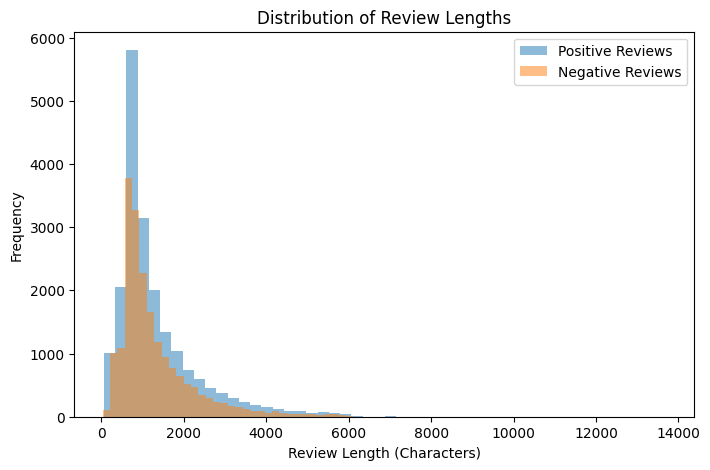

In [ ]:
# TO BE COMPLETED
df['review_length'] = df['review'].str.len()
average_length = df['review_length'].mean()
longest_review = df['review_length'].max()
shortest_review = df['review_length'].min()
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']
positive_length = positive_reviews['review_length'].mean()
negative_length = negative_reviews['review_length'].mean()
num_positive = len(positive_reviews)
num_negative = len(negative_reviews)

print(f"Average review length: {average_length:.2f}")
print(f"Longest review length: {longest_review}")
print(f"Shortest review length: {shortest_review}")
print(f"Average length of positive reviews: {positive_length:.2f}")
print(f"Average length of negative reviews: {negative_length:.2f}")
print(f"Number of positive reviews: {num_positive}")
print(f"Number of negative reviews: {num_negative}")

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(positive_reviews['review_length'], bins=50, alpha=0.5, label="Positive Reviews")
plt.hist(negative_reviews['review_length'], bins=50, alpha=0.5, label="Negative Reviews")
plt.xlabel("Review Length (Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.legend()
plt.show()

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

General observations:
The histogram shows that the majority of reviews length fall within a relatively short to moderate range, with a right-skewed tail extending to much longer reviews.
The average review length is 1,311 characters, indicating that most reviews provide at least a few paragraphs of detail. Nonetheless, there are outliers on the high end, with the longest review being 13,704 characters suggesting some users write extremely detailed reviews.
The shortest review in the dataset is just 32 characters, reflecting that some users provide very concise feedback. Such short reviews may lack rich sentiment cues and could pose challenges for text classification models.

Observations positive vs negative:
Positive reviews tend to be slightly longer on average (1,325.87) compared to negative reviews (1,296.60).
While this difference is not large, it suggests that people who are satisfied with a product or experience may provide more detail.
Both positive and negative reviews follow a similar distribution shape, indicating that the review length alone may not be a strong distinguishing factor between sentiment categories.
When building text classification models, it will be important to address any potential length-based bias by either normalizing input size or leveraging advanced architectures (such as transformers) that can effectively handle variable-length text without overreliance on mere character count.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nGeneral observations:\nThe histogram shows that the majority of reviews length fall within a relatively short to moderate range, with a right-skewed tail extending to much longer reviews.\nThe average review length is 1,311 characters, indicating that most reviews provide at least a few paragraphs of detail. Nonetheless, there are outliers on the high end, with the longest review being 13,704 characters suggesting some users write extremely detailed reviews.\nThe shortest review in the dataset is just 32 characters, reflecting that some users provide very concise feedback. Such short reviews may lack rich sentiment cues and could pose challenges for text classification models.\n\nObservations positive vs negative:\nPositive reviews tend to be slightly longer on average (1,325.87) compared to negative reviews (1,296.60).\nWhile this difference is not large, it suggests that people who are satisfied with a product or experience may provide more detail.\nBo

### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [ ]:
X[0]

"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended th

In [ ]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                             if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return np.array(data_encoded, dtype=object), np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The function preprocess_string removes all non-word characters punctuation, digits, and whitespace.
This cleaning step ensures only alphanumeric content remains. It helps to reduce noise in the text and standardizes inputs before further processing.

In preprocess_sentence, the text is converted to lowercase and then split on whitespace. Lowercasing normalizes words to reduce duplication in the vocabulary.
Stopword filtering makes words like “the,” “is,” and “and removed by checking membership in the NLTK stopword set.
Eliminating stopwords can reduce the dimensionality of the data and helps the model focus on more meaningful tokens for sentiment analysis.

The function get_stoi builds a list of the most frequent words. Assigning each word an integer ID creates a numerical representation needed for model inputs.

In tokenize, each review is converted from words to integers using the stoi dictionary. This step is critical because neural networks, including LSTM models, require numerical inputs rather than raw strings.
The code also converts textual labels (“positive” or “negative”) into binary numerical labels (1 or 0). This is essential for supervised training, where the model learns to predict these numeric labels.

The function padding_ pads or truncates tokenized reviews to a fixed seq_len. Padding with zeros ensures uniform input shapes.
This step simplifies batch processing and aligns with the requirements of deep learning frameworks.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nThe function preprocess_string removes all non-word characters punctuation, digits, and whitespace.\nThis cleaning step ensures only alphanumeric content remains. It helps to reduce noise in the text and standardizes inputs before further processing.\n\nIn preprocess_sentence, the text is converted to lowercase and then split on whitespace. Lowercasing normalizes words to reduce duplication in the vocabulary.\nStopword filtering makes words like “the,” “is,” and “and removed by checking membership in the NLTK stopword set.\nEliminating stopwords can reduce the dimensionality of the data and helps the model focus on more meaningful tokens for sentiment analysis.\n\nThe function get_stoi builds a list of the most frequent words. Assigning each word an integer ID creates a numerical representation needed for model inputs.\n\nIn tokenize, each review is converted from words to integers using the stoi dictionary. This step is critical because neural networks,

### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [ ]:
# TO BE COMPLETED
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=123, stratify=df['sentiment'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=123, stratify=temp_df['sentiment'])

# Extract reviews and labels from each split
train_reviews = train_df['review'].tolist()
train_labels  = train_df['sentiment'].tolist()

valid_reviews = valid_df['review'].tolist()
valid_labels  = valid_df['sentiment'].tolist()

test_reviews  = test_df['review'].tolist()
test_labels   = test_df['sentiment'].tolist()

# Build Vocabulary from Training Data
stoi = get_stoi(train_reviews)

train_data_encoded, train_labels_encoded = tokenize(train_reviews, train_labels, stoi)
valid_data_encoded, valid_labels_encoded = tokenize(valid_reviews, valid_labels, stoi)
test_data_encoded,  test_labels_encoded  = tokenize(test_reviews,  test_labels, stoi)

# Pad Sequences to a Length of 500
train_features = padding_(train_data_encoded, 500)
valid_features = padding_(valid_data_encoded, 500)
test_features  = padding_(test_data_encoded, 500)

<built-in method get of Counter object at 0x7e2c69a43590>


In [ ]:
train_data_encoded.shape, train_features.shape, train_labels_encoded.shape

((24000,), (24000, 500), (24000,))

In [ ]:
valid_features.shape

(8000, 500)

In [ ]:
test_features.shape

(8000, 500)

### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [ ]:
# TO BE COMPLETED
import torch
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):
  def __init__(self, features, labels):
    # Convert features and labels to Torch tensors and Ensuring they are in the correct dtype for embedding/nn usage
    self.features = torch.tensor(features, dtype=torch.long)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    # Total number of samples
    return len(self.features)

  def __getitem__(self, idx):
    # Return a single sample of data (X, y)
    return self.features[idx], self.labels[idx]

In [ ]:
# Create Dataset instances for train and validation splits
train_dataset = ReviewDataset(train_features, train_labels_encoded)
valid_dataset = ReviewDataset(valid_features, valid_labels_encoded)
test_dataset = ReviewDataset(test_features, test_labels_encoded)
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Verify DataLoader by fetching one batch
train_batch = next(iter(train_loader))
# train_batch is a tuple (features_batch, labels_batch) of size 2
features_batch, labels_batch = train_batch

print("Batch features shape:", features_batch.shape)
print("Batch labels shape:", labels_batch.shape)

Batch features shape: torch.Size([16, 500])
Batch labels shape: torch.Size([16])


## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

An example is provided below in `BaselineSentimentRNN`, which you can use for inspiration. However, you should build your own model.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [ ]:
class BaselineSentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=4, hidden_dim=4, output_dim=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        # Vanilla RNN returns: outputs, hidden
        outputs, hidden = self.rnn(embedded)
        # hidden.shape = (num_layers, batch_size, hidden_dim)
        out = self.fc(hidden[-1])  # take the last layer's hidden state
        return out

In [ ]:
# # TO BE COMPLETED

# class SentimentRNN(nn.Module):
#     def __init__(self):
#         super(SentimentRNN, self).__init__()

#         # TO BE COMPLETED

#     def forward(self, x, hidden):

#         # TO BE COMPLETED



# model = SentimentRNN()


In [ ]:
# My first model, it's more powerful, but take such a long time to training each time, so I choose to use a simpler version during hyperparameter tuning process
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=256, n_layers=2, output_dim=2, dropout=0.2):
        super(SentimentRNN, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            batch_first=True, # input & output tensors are (batch, seq_len, feature)
            dropout=dropout if n_layers > 1 else 0) # dropout is only applied between stacked LSTM layers if n_layers > 1
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        embedded = self.embedding(x) # shape: (batch_size, seq_len, embedding_dim)
        lstm_out, (h_n, c_n) = self.lstm(embedded) # h_n has shape: (n_layers, batch_size, hidden_dim)
        hidden = h_n[-1] # last layer shape: (batch_size, hidden_dim)
        out = self.fc1(hidden)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)

        return out

In [ ]:
# A smaller LSTM-based sentiment analysis model that's faster to train yet still capable of learning effectively to save training time using T4 GPU
class SimplifiedSentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=64, hidden_dim=64, n_layers=1, output_dim=2, dropout=0.2):
        super(SimplifiedSentimentRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            batch_first=True,
            dropout=dropout if n_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, _) = self.lstm(embedded)
        hidden = hidden[-1]
        hidden = self.dropout(hidden)
        out = self.fc(hidden)
        return out

## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data, criterion, device):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in data:
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          total_loss += loss.item()

          _, predicted = torch.max(outputs, 1)
          total_err += (predicted != labels).sum().item()
          correct_predictions += (predicted == labels).sum().item()
          total_samples += len(labels)

    accuracy = correct_predictions / total_samples  # Compute accuracy
    avg_loss = total_loss / len(data)  # Compute average loss

    return accuracy, avg_loss

### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [ ]:
# Verify vocab size
max_index = 0
for inputs, _ in train_loader:
    batch_max = inputs.max().item()
    if batch_max > max_index:
        max_index = batch_max

print(f"Overall max token index: {max_index}")

Overall max token index: 1000


In [ ]:
# BaselineSentimentRNN Training
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # Debug
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = BaselineSentimentRNN(vocab_size=max_index + 1, embedding_dim=4, hidden_dim=4, output_dim=2)
model.to(device)

Using device: cuda


BaselineSentimentRNN(
  (embedding): Embedding(1001, 4)
  (rnn): RNN(4, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=2, bias=True)
)

Epoch 1/10 | Train Loss: 0.6919 | Train Acc: 0.5397 | Val Loss: 0.6867 | Val Acc: 0.5481
Epoch 2/10 | Train Loss: 0.6688 | Train Acc: 0.5864 | Val Loss: 0.6635 | Val Acc: 0.6031
Epoch 3/10 | Train Loss: 0.6094 | Train Acc: 0.6734 | Val Loss: 0.5921 | Val Acc: 0.6954
Epoch 4/10 | Train Loss: 0.5656 | Train Acc: 0.7196 | Val Loss: 0.5750 | Val Acc: 0.7156
Epoch 5/10 | Train Loss: 0.5541 | Train Acc: 0.7308 | Val Loss: 0.5733 | Val Acc: 0.7153
Epoch 6/10 | Train Loss: 0.5335 | Train Acc: 0.7473 | Val Loss: 0.5529 | Val Acc: 0.7346
Epoch 7/10 | Train Loss: 0.5202 | Train Acc: 0.7584 | Val Loss: 0.5375 | Val Acc: 0.7481
Epoch 8/10 | Train Loss: 0.5171 | Train Acc: 0.7615 | Val Loss: 0.5320 | Val Acc: 0.7491
Epoch 9/10 | Train Loss: 0.4940 | Train Acc: 0.7765 | Val Loss: 0.5193 | Val Acc: 0.7600
Epoch 10/10 | Train Loss: 0.5198 | Train Acc: 0.7525 | Val Loss: 0.5120 | Val Acc: 0.7629


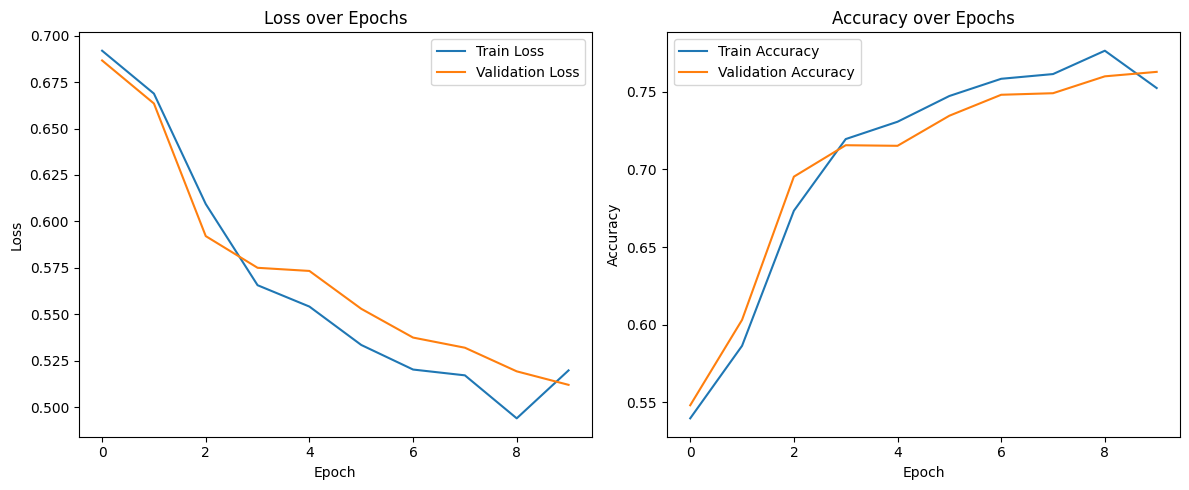

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

# Model training
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# SentimentRNN (my model)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SentimentRNN(vocab_size=max_index + 1, embedding_dim=4, hidden_dim=4, output_dim=2)
model.to(device)

Using device: cuda


SentimentRNN(
  (embedding): Embedding(1001, 4)
  (lstm): LSTM(4, 4, num_layers=2, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

Epoch 1/10 | Train Loss: 0.6626 | Train Acc: 0.5921 | Val Loss: 0.6221 | Val Acc: 0.6548
Epoch 2/10 | Train Loss: 0.5652 | Train Acc: 0.7185 | Val Loss: 0.5237 | Val Acc: 0.7465
Epoch 3/10 | Train Loss: 0.4859 | Train Acc: 0.7760 | Val Loss: 0.4661 | Val Acc: 0.7847
Epoch 4/10 | Train Loss: 0.4323 | Train Acc: 0.8110 | Val Loss: 0.4328 | Val Acc: 0.8089
Epoch 5/10 | Train Loss: 0.3984 | Train Acc: 0.8263 | Val Loss: 0.4042 | Val Acc: 0.8199
Epoch 6/10 | Train Loss: 0.3763 | Train Acc: 0.8403 | Val Loss: 0.3851 | Val Acc: 0.8337
Epoch 7/10 | Train Loss: 0.3564 | Train Acc: 0.8520 | Val Loss: 0.3799 | Val Acc: 0.8340
Epoch 8/10 | Train Loss: 0.3482 | Train Acc: 0.8545 | Val Loss: 0.3782 | Val Acc: 0.8343
Epoch 9/10 | Train Loss: 0.3395 | Train Acc: 0.8589 | Val Loss: 0.3713 | Val Acc: 0.8404
Epoch 10/10 | Train Loss: 0.3330 | Train Acc: 0.8630 | Val Loss: 0.3614 | Val Acc: 0.8488


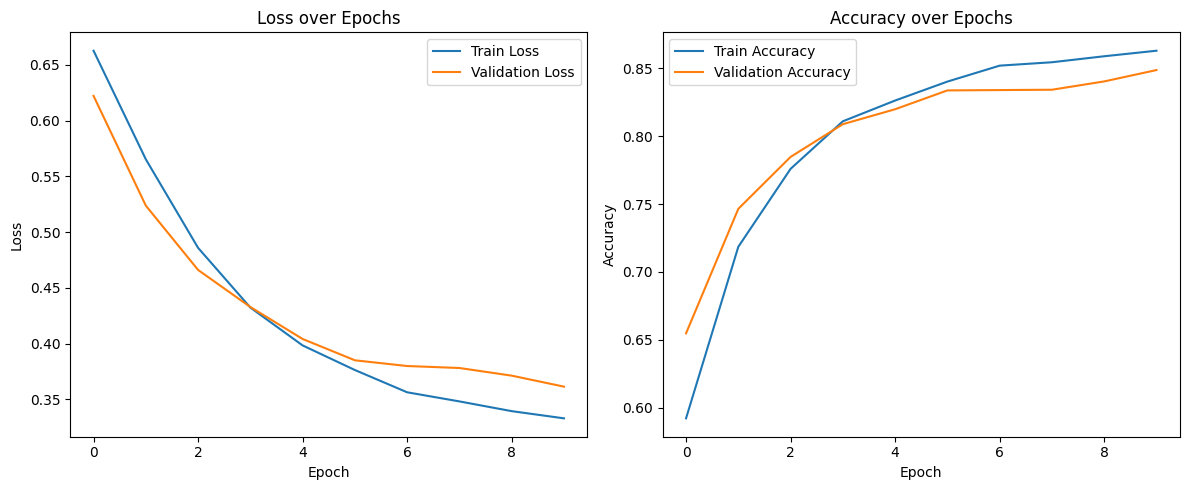

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

1. Tuning Embedding Dimension (Architecture-related) Tested Values: [32, 128]  
The embedding dimension determines how richly each word is represented.  
Small embeddings resulted in faster training but lower accuracy due to limited representation of words.  
Very large embeddings provided richer features but increased the risk of overfitting and longer training time.

In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32)
model.to(device)

learning_rate = 0.01
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.4583 | Train Acc: 0.7843 | Val Loss: 0.3976 | Val Acc: 0.8364
Epoch 2/10 | Train Loss: 0.3595 | Train Acc: 0.8473 | Val Loss: 0.3865 | Val Acc: 0.8370
Epoch 3/10 | Train Loss: 0.3418 | Train Acc: 0.8538 | Val Loss: 0.3837 | Val Acc: 0.8360
Epoch 4/10 | Train Loss: 0.3369 | Train Acc: 0.8582 | Val Loss: 0.3719 | Val Acc: 0.8380
Epoch 5/10 | Train Loss: 0.3408 | Train Acc: 0.8567 | Val Loss: 0.3943 | Val Acc: 0.8357
Epoch 6/10 | Train Loss: 0.3351 | Train Acc: 0.8598 | Val Loss: 0.3956 | Val Acc: 0.8249
Epoch 7/10 | Train Loss: 0.3456 | Train Acc: 0.8537 | Val Loss: 0.3938 | Val Acc: 0.8301
Epoch 8/10 | Train Loss: 0.3430 | Train Acc: 0.8558 | Val Loss: 0.3913 | Val Acc: 0.8234
Epoch 9/10 | Train Loss: 0.3544 | Train Acc: 0.8483 | Val Loss: 0.4129 | Val Acc: 0.8203
Epoch 10/10 | Train Loss: 0.3866 | Train Acc: 0.8343 | Val Loss: 0.4342 | Val Acc: 0.8003


In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 128)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=128)
model.to(device)

learning_rate = 0.01
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.5017 | Train Acc: 0.7649 | Val Loss: 0.4677 | Val Acc: 0.7889
Epoch 2/10 | Train Loss: 0.4435 | Train Acc: 0.8035 | Val Loss: 0.4500 | Val Acc: 0.7981
Epoch 3/10 | Train Loss: 0.4493 | Train Acc: 0.7996 | Val Loss: 0.5018 | Val Acc: 0.7578
Epoch 4/10 | Train Loss: 0.4515 | Train Acc: 0.7975 | Val Loss: 0.5101 | Val Acc: 0.7520
Epoch 5/10 | Train Loss: 0.4611 | Train Acc: 0.7927 | Val Loss: 0.4703 | Val Acc: 0.7774
Epoch 6/10 | Train Loss: 0.4445 | Train Acc: 0.8039 | Val Loss: 0.4766 | Val Acc: 0.7943
Epoch 7/10 | Train Loss: 0.4383 | Train Acc: 0.8063 | Val Loss: 0.4696 | Val Acc: 0.7880
Epoch 8/10 | Train Loss: 0.4524 | Train Acc: 0.7944 | Val Loss: 0.4842 | Val Acc: 0.7700
Epoch 9/10 | Train Loss: 0.4510 | Train Acc: 0.7956 | Val Loss: 0.4604 | Val Acc: 0.7869
Epoch 10/10 | Train Loss: 0.4707 | Train Acc: 0.7794 | Val Loss: 0.4786 | Val Acc: 0.7726


By tuning, I choose to use embedding_dim=32 with a higher validation accuarcy and better loss distribution



2. Tuning hidden dimension (Architecture-related) Values: [64, 128]  
The hidden dimension size controls the model’s ability to capture complex sequential patterns.  
A smaller hidden dimension led to underfitting, limiting the model's capability.    
A very large hidden dimension caused overfitting and slow training without significant accuracy improvement.  

In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 23, hidden_dim = 64)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.01
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.4971 | Train Acc: 0.7572 | Val Loss: 0.4322 | Val Acc: 0.8007
Epoch 2/10 | Train Loss: 0.3668 | Train Acc: 0.8423 | Val Loss: 0.4039 | Val Acc: 0.8300
Epoch 3/10 | Train Loss: 0.3453 | Train Acc: 0.8567 | Val Loss: 0.4010 | Val Acc: 0.8180
Epoch 4/10 | Train Loss: 0.3427 | Train Acc: 0.8540 | Val Loss: 0.3743 | Val Acc: 0.8351
Epoch 5/10 | Train Loss: 0.3446 | Train Acc: 0.8520 | Val Loss: 0.3752 | Val Acc: 0.8375
Epoch 6/10 | Train Loss: 0.3352 | Train Acc: 0.8580 | Val Loss: 0.3980 | Val Acc: 0.8347
Epoch 7/10 | Train Loss: 0.3288 | Train Acc: 0.8606 | Val Loss: 0.3973 | Val Acc: 0.8315
Epoch 8/10 | Train Loss: 0.3349 | Train Acc: 0.8603 | Val Loss: 0.3972 | Val Acc: 0.8283
Epoch 9/10 | Train Loss: 0.3422 | Train Acc: 0.8544 | Val Loss: 0.3935 | Val Acc: 0.8299
Epoch 10/10 | Train Loss: 0.3465 | Train Acc: 0.8532 | Val Loss: 0.4023 | Val Acc: 0.8239


In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 128)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 128)
model.to(device)

learning_rate = 0.01
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.4598 | Train Acc: 0.7773 | Val Loss: 0.3897 | Val Acc: 0.8280
Epoch 2/10 | Train Loss: 0.3613 | Train Acc: 0.8476 | Val Loss: 0.3712 | Val Acc: 0.8417
Epoch 3/10 | Train Loss: 0.3409 | Train Acc: 0.8566 | Val Loss: 0.3770 | Val Acc: 0.8324
Epoch 4/10 | Train Loss: 0.3333 | Train Acc: 0.8588 | Val Loss: 0.3709 | Val Acc: 0.8360
Epoch 5/10 | Train Loss: 0.3234 | Train Acc: 0.8636 | Val Loss: 0.4024 | Val Acc: 0.8314
Epoch 6/10 | Train Loss: 0.3334 | Train Acc: 0.8618 | Val Loss: 0.3968 | Val Acc: 0.8276
Epoch 7/10 | Train Loss: 0.3618 | Train Acc: 0.8443 | Val Loss: 0.3954 | Val Acc: 0.8299
Epoch 8/10 | Train Loss: 0.3546 | Train Acc: 0.8470 | Val Loss: 0.4102 | Val Acc: 0.8237
Epoch 9/10 | Train Loss: 0.3794 | Train Acc: 0.8408 | Val Loss: 0.4187 | Val Acc: 0.8117
Epoch 10/10 | Train Loss: 0.3967 | Train Acc: 0.8255 | Val Loss: 0.4399 | Val Acc: 0.8095


By tuning, I choose to use hidden_dim = 64 with a higher validation accuarcy and better loss distribution

3. Learning Rate (Optimizer-related) Tested Values: [0.005, 0.001. 0.0005]  
The learning rate determines how aggressively the model updates its weights during training.    
A high learning rate led to unstable training with fluctuations in validation accuracy.  
A low learning rate converged slowly and occasionally got stuck in suboptimal minima.  

In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.05)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.005
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.5043 | Train Acc: 0.7500 | Val Loss: 0.3833 | Val Acc: 0.8365
Epoch 2/10 | Train Loss: 0.3482 | Train Acc: 0.8536 | Val Loss: 0.3641 | Val Acc: 0.8406
Epoch 3/10 | Train Loss: 0.3152 | Train Acc: 0.8688 | Val Loss: 0.3639 | Val Acc: 0.8366
Epoch 4/10 | Train Loss: 0.2915 | Train Acc: 0.8786 | Val Loss: 0.3700 | Val Acc: 0.8434
Epoch 5/10 | Train Loss: 0.2617 | Train Acc: 0.8931 | Val Loss: 0.3743 | Val Acc: 0.8472
Epoch 6/10 | Train Loss: 0.2436 | Train Acc: 0.8996 | Val Loss: 0.3895 | Val Acc: 0.8468
Epoch 7/10 | Train Loss: 0.2218 | Train Acc: 0.9099 | Val Loss: 0.3992 | Val Acc: 0.8454
Epoch 8/10 | Train Loss: 0.1980 | Train Acc: 0.9219 | Val Loss: 0.4518 | Val Acc: 0.8354
Epoch 9/10 | Train Loss: 0.1898 | Train Acc: 0.9250 | Val Loss: 0.4385 | Val Acc: 0.8399
Epoch 10/10 | Train Loss: 0.1732 | Train Acc: 0.9308 | Val Loss: 0.4554 | Val Acc: 0.8361


In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.001)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.001
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.5464 | Train Acc: 0.7190 | Val Loss: 0.4508 | Val Acc: 0.7970
Epoch 2/10 | Train Loss: 0.3908 | Train Acc: 0.8300 | Val Loss: 0.4224 | Val Acc: 0.8084
Epoch 3/10 | Train Loss: 0.3414 | Train Acc: 0.8552 | Val Loss: 0.3667 | Val Acc: 0.8397
Epoch 4/10 | Train Loss: 0.3164 | Train Acc: 0.8689 | Val Loss: 0.3607 | Val Acc: 0.8441
Epoch 5/10 | Train Loss: 0.2979 | Train Acc: 0.8765 | Val Loss: 0.3787 | Val Acc: 0.8448
Epoch 6/10 | Train Loss: 0.2856 | Train Acc: 0.8835 | Val Loss: 0.3554 | Val Acc: 0.8495
Epoch 7/10 | Train Loss: 0.2645 | Train Acc: 0.8910 | Val Loss: 0.3654 | Val Acc: 0.8439
Epoch 8/10 | Train Loss: 0.2489 | Train Acc: 0.8997 | Val Loss: 0.3822 | Val Acc: 0.8474
Epoch 9/10 | Train Loss: 0.2357 | Train Acc: 0.9054 | Val Loss: 0.4440 | Val Acc: 0.8414
Epoch 10/10 | Train Loss: 0.2138 | Train Acc: 0.9147 | Val Loss: 0.3992 | Val Acc: 0.8390


In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.0005)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.0005
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/10 | Train Loss: 0.5853 | Train Acc: 0.6776 | Val Loss: 0.4835 | Val Acc: 0.7784
Epoch 2/10 | Train Loss: 0.4214 | Train Acc: 0.8137 | Val Loss: 0.3961 | Val Acc: 0.8221
Epoch 3/10 | Train Loss: 0.3684 | Train Acc: 0.8427 | Val Loss: 0.3778 | Val Acc: 0.8293
Epoch 4/10 | Train Loss: 0.3405 | Train Acc: 0.8575 | Val Loss: 0.4224 | Val Acc: 0.8306
Epoch 5/10 | Train Loss: 0.3229 | Train Acc: 0.8650 | Val Loss: 0.3636 | Val Acc: 0.8450
Epoch 6/10 | Train Loss: 0.3068 | Train Acc: 0.8736 | Val Loss: 0.3592 | Val Acc: 0.8441
Epoch 7/10 | Train Loss: 0.2952 | Train Acc: 0.8783 | Val Loss: 0.3614 | Val Acc: 0.8425
Epoch 8/10 | Train Loss: 0.2819 | Train Acc: 0.8854 | Val Loss: 0.3594 | Val Acc: 0.8440
Epoch 9/10 | Train Loss: 0.2692 | Train Acc: 0.8912 | Val Loss: 0.3640 | Val Acc: 0.8381
Epoch 10/10 | Train Loss: 0.2593 | Train Acc: 0.8960 | Val Loss: 0.3737 | Val Acc: 0.8434


By tuning, I choose to use learning_rate = 0.0005 with a higher validation accuarcy and better loss distribution

4. Tuing epoch; Tested Values: [8, 15, 20]  
The number of epochs determines how many times the model goes through the entire training dataset.  
A low number of epochs led to underfitting, where the model did not learn the full pattern from the data, resulting in lower validation accuracy.  
A high number of epochs caused overfitting, where the model memorized the training data but failed to generalize well to the validation set.  

In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.0005, epoch = 15)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.0005
num_epochs = 15
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/15 | Train Loss: 0.5775 | Train Acc: 0.6853 | Val Loss: 0.4763 | Val Acc: 0.7744
Epoch 2/15 | Train Loss: 0.4197 | Train Acc: 0.8138 | Val Loss: 0.4396 | Val Acc: 0.8094
Epoch 3/15 | Train Loss: 0.3652 | Train Acc: 0.8413 | Val Loss: 0.3879 | Val Acc: 0.8307
Epoch 4/15 | Train Loss: 0.3399 | Train Acc: 0.8551 | Val Loss: 0.3899 | Val Acc: 0.8311
Epoch 5/15 | Train Loss: 0.3254 | Train Acc: 0.8635 | Val Loss: 0.3721 | Val Acc: 0.8334
Epoch 6/15 | Train Loss: 0.3077 | Train Acc: 0.8703 | Val Loss: 0.3607 | Val Acc: 0.8454
Epoch 7/15 | Train Loss: 0.2953 | Train Acc: 0.8748 | Val Loss: 0.3673 | Val Acc: 0.8441
Epoch 8/15 | Train Loss: 0.2828 | Train Acc: 0.8836 | Val Loss: 0.3663 | Val Acc: 0.8411
Epoch 9/15 | Train Loss: 0.2745 | Train Acc: 0.8865 | Val Loss: 0.3619 | Val Acc: 0.8403
Epoch 10/15 | Train Loss: 0.2644 | Train Acc: 0.8903 | Val Loss: 0.3798 | Val Acc: 0.8441
Epoch 11/15 | Train Loss: 0.2460 | Train Acc: 0.9012 | Val Loss: 0.3999 | Val Acc: 0.8404


In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.0005, epoch = 8)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.0005
num_epochs = 8
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/8 | Train Loss: 0.5935 | Train Acc: 0.6708 | Val Loss: 0.4839 | Val Acc: 0.7711
Epoch 2/8 | Train Loss: 0.4247 | Train Acc: 0.8057 | Val Loss: 0.4012 | Val Acc: 0.8231
Epoch 3/8 | Train Loss: 0.3659 | Train Acc: 0.8419 | Val Loss: 0.3800 | Val Acc: 0.8324
Epoch 4/8 | Train Loss: 0.3478 | Train Acc: 0.8561 | Val Loss: 0.3681 | Val Acc: 0.8405
Epoch 5/8 | Train Loss: 0.3209 | Train Acc: 0.8665 | Val Loss: 0.3802 | Val Acc: 0.8380
Epoch 6/8 | Train Loss: 0.3092 | Train Acc: 0.8735 | Val Loss: 0.3687 | Val Acc: 0.8371
Epoch 7/8 | Train Loss: 0.2997 | Train Acc: 0.8780 | Val Loss: 0.3701 | Val Acc: 0.8360
Epoch 8/8 | Train Loss: 0.2824 | Train Acc: 0.8849 | Val Loss: 0.3692 | Val Acc: 0.8471


In [ ]:
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.0005, epoch = 20)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.0005
num_epochs = 20
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

Using device: cuda
Epoch 1/20 | Train Loss: 0.5735 | Train Acc: 0.6884 | Val Loss: 0.4736 | Val Acc: 0.7755
Epoch 2/20 | Train Loss: 0.4104 | Train Acc: 0.8193 | Val Loss: 0.3971 | Val Acc: 0.8256
Epoch 3/20 | Train Loss: 0.3623 | Train Acc: 0.8447 | Val Loss: 0.3786 | Val Acc: 0.8313
Epoch 4/20 | Train Loss: 0.3398 | Train Acc: 0.8583 | Val Loss: 0.3919 | Val Acc: 0.8319
Epoch 5/20 | Train Loss: 0.3216 | Train Acc: 0.8648 | Val Loss: 0.3690 | Val Acc: 0.8450
Epoch 6/20 | Train Loss: 0.3025 | Train Acc: 0.8769 | Val Loss: 0.4013 | Val Acc: 0.8360
Epoch 7/20 | Train Loss: 0.2912 | Train Acc: 0.8803 | Val Loss: 0.3750 | Val Acc: 0.8365
Epoch 8/20 | Train Loss: 0.2796 | Train Acc: 0.8857 | Val Loss: 0.3705 | Val Acc: 0.8374
Epoch 9/20 | Train Loss: 0.2628 | Train Acc: 0.8942 | Val Loss: 0.3586 | Val Acc: 0.8455
Epoch 10/20 | Train Loss: 0.2553 | Train Acc: 0.8981 | Val Loss: 0.4362 | Val Acc: 0.8079
Epoch 11/20 | Train Loss: 0.2422 | Train Acc: 0.9028 | Val Loss: 0.3823 | Val Acc: 0.8504


Using device: cuda
Epoch 1/10 | Train Loss: 0.6749 | Train Acc: 0.5695 | Val Loss: 0.6280 | Val Acc: 0.6436
Epoch 2/10 | Train Loss: 0.5683 | Train Acc: 0.7083 | Val Loss: 0.5412 | Val Acc: 0.7265
Epoch 3/10 | Train Loss: 0.4988 | Train Acc: 0.7642 | Val Loss: 0.4853 | Val Acc: 0.7670
Epoch 4/10 | Train Loss: 0.4492 | Train Acc: 0.7942 | Val Loss: 0.4504 | Val Acc: 0.7930
Epoch 5/10 | Train Loss: 0.4171 | Train Acc: 0.8146 | Val Loss: 0.4342 | Val Acc: 0.7995
Epoch 6/10 | Train Loss: 0.3958 | Train Acc: 0.8244 | Val Loss: 0.4060 | Val Acc: 0.8177
Epoch 7/10 | Train Loss: 0.3777 | Train Acc: 0.8359 | Val Loss: 0.4086 | Val Acc: 0.8185
Epoch 8/10 | Train Loss: 0.3660 | Train Acc: 0.8406 | Val Loss: 0.3865 | Val Acc: 0.8261
Epoch 9/10 | Train Loss: 0.3549 | Train Acc: 0.8461 | Val Loss: 0.3837 | Val Acc: 0.8301
Epoch 10/10 | Train Loss: 0.3450 | Train Acc: 0.8521 | Val Loss: 0.3812 | Val Acc: 0.8316


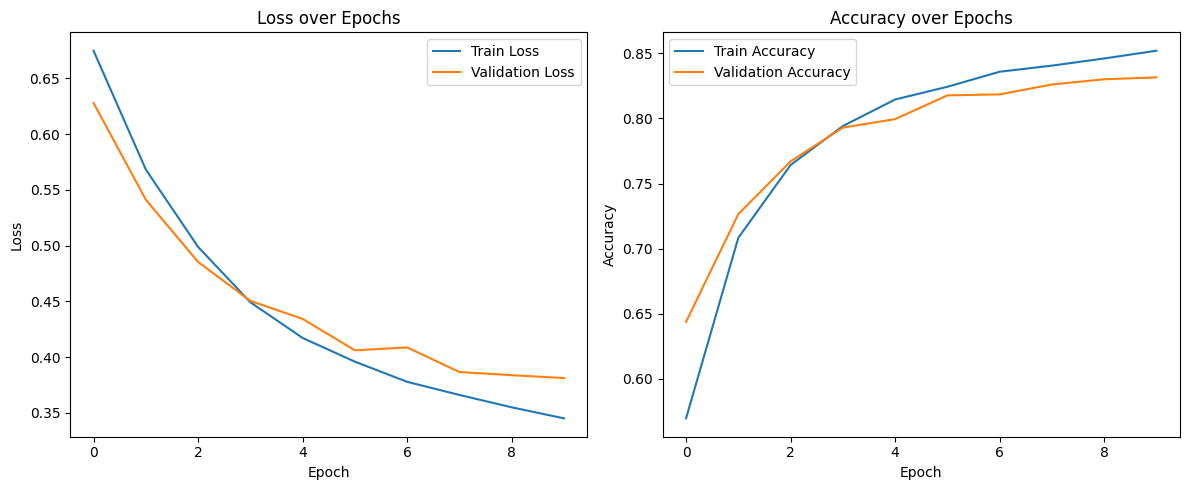

In [ ]:
# Final version and plot
# TO BE COMPLETED
# Model Architecture-related tuning
# SimplifiedSentimentRNN (my model with embedding_dim = 32, hidden_dim = 64, lr = 0.0001, epoch = 10)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # debug

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim = 64)
model.to(device)

learning_rate = 0.0001
num_epochs = 10
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW
By tuning both architecture-related and optimization-related hyperparameters, I determined that the optimal configuration for this model is
embedding_dim = 32, hidden_dim = 64, learning_rate = 0.0001, and epochs = 10.
This selection was based on achieving the best balance between training efficiency, generalization, and validation accuracy.
The chosen hyperparameters effectively minimized validation loss while maintaining stable and increasing accuracy, as seen in the training curves.
'''

'\nPROVIDE YOUR ANSWER BELOW\nBy tuning both architecture-related and optimization-related hyperparameters, I determined that the optimal configuration for this model is \nembedding_dim = 32, hidden_dim = 64, learning_rate = 0.0001, and epochs = 10. \nThis selection was based on achieving the best balance between training efficiency, generalization, and validation accuracy. \nThe chosen hyperparameters effectively minimized validation loss while maintaining stable and increasing accuracy, as seen in the training curves.\n'

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [ ]:
# Set device (use CUDA if available, otherwise fallback to CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = SimplifiedSentimentRNN(vocab_size=max_index + 1, embedding_dim=32, hidden_dim=64)
model.to(device)
epoch = 10
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define a function for training
import torch

def train_model(model, train_loader, valid_loader, criterion, optimizer, device, epochs):
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct_train / total_train

        valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

    return train_losses, train_accuracies, valid_losses, valid_accuracies

train_model(model, train_loader, valid_loader, criterion, optimizer, device, epoch)

# Evaluation function (Test Accuracy)
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    test_loss = total_loss / len(test_loader)
    test_accuracy = correct_predictions / total_samples

    print(f"\nTest Evaluation Results:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return test_loss, test_accuracy

test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)

Using device: cuda
Epoch 1/10 | Train Loss: 0.6876 | Train Acc: 0.5433 | Val Loss: 0.6773 | Val Acc: 0.5853
Epoch 2/10 | Train Loss: 0.6024 | Train Acc: 0.6750 | Val Loss: 0.5574 | Val Acc: 0.7228
Epoch 3/10 | Train Loss: 0.5060 | Train Acc: 0.7618 | Val Loss: 0.4845 | Val Acc: 0.7674
Epoch 4/10 | Train Loss: 0.4474 | Train Acc: 0.7986 | Val Loss: 0.4445 | Val Acc: 0.7985
Epoch 5/10 | Train Loss: 0.4155 | Train Acc: 0.8163 | Val Loss: 0.4278 | Val Acc: 0.8044
Epoch 6/10 | Train Loss: 0.3920 | Train Acc: 0.8288 | Val Loss: 0.4254 | Val Acc: 0.8077
Epoch 7/10 | Train Loss: 0.3763 | Train Acc: 0.8354 | Val Loss: 0.4019 | Val Acc: 0.8227
Epoch 8/10 | Train Loss: 0.3632 | Train Acc: 0.8427 | Val Loss: 0.3901 | Val Acc: 0.8280
Epoch 9/10 | Train Loss: 0.3509 | Train Acc: 0.8496 | Val Loss: 0.3857 | Val Acc: 0.8296
Epoch 10/10 | Train Loss: 0.3434 | Train Acc: 0.8552 | Val Loss: 0.3811 | Val Acc: 0.8335

Test Evaluation Results:
Test Loss: 0.3646
Test Accuracy: 0.8434


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The training accuracy (85.52%) is slightly higher than the validation accuracy (83.35%), which indicates the model has learned well without excessive overfitting.
The test accuracy (84.34%) is very close to the validation accuracy, showing that the model generalizes well to unseen data.

These results are what I expected: the test accuracy is slightly lower than the training accuracy but close to validation accuracy.
There is no significant overfitting since validation and test accuracy are similar. The model is not underfitting, as training accuracy is reasonably high and converges well.

'''

### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [ ]:
# TO BE COMPLETED
# Create index-to-word mapping
itos = {idx: word for word, idx in stoi.items()}
def decode_text(tokenized_input):
    return " ".join([itos[idx] for idx in tokenized_input if idx in itos])

In [ ]:
def get_misclassified_samples(model, test_loader, device, decode_text, label_map, num_samples=5):
    model.eval()
    misclassified_positive = []  # False Negatives (Actual: Positive, Predicted: Negative)
    misclassified_negative = []  # False Positives (Actual: Negative, Predicted: Positive)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1) # Get predicted class

            for i in range(len(labels)):
                true_label = labels[i].item()
                pred_label = predicted[i].item()

                if true_label != pred_label:
                    review_text = decode_text(inputs[i].cpu().numpy())  # Convert tokens to text
                    if true_label == label_map['positive']:  # Misclassified positive review
                        misclassified_positive.append(review_text)
                    else:  # Misclassified negative review
                        misclassified_negative.append(review_text)

                if len(misclassified_positive) >= num_samples and len(misclassified_negative) >= num_samples:
                    break

    return misclassified_positive[:num_samples], misclassified_negative[:num_samples]

# Assuming label mapping
label_map = {'negative': 0, 'positive': 1}

# Run with either a pretrained tokenizer or custom token mapping
misclassified_pos, misclassified_neg = get_misclassified_samples(model, test_loader, device, decode_text, label_map, num_samples=5)

In [ ]:
print("\n Misclassified Positive Reviews (Should be Positive, Predicted as Negative):")
for idx, review in enumerate(misclassified_pos):
    print(f"{idx+1}. {review}")

print("\n Misclassified Negative Reviews (Should be Negative, Predicted as Positive):")
for idx, review in enumerate(misclassified_neg):
    print(f"{idx+1}. {review}")


 Misclassified Positive Reviews (Should be Positive, Predicted as Negative):
1. film rather comment past br br recently watched truth like watching remake sequel except rather similar message films based young often war films show forced young make killing falls short people theyre fighting ultimately lost war war well br br comment film could easily left mind film message point view would speak audience
2. richard character movie hes three times yet beginning film tries make four body almost amazing girl br period piece era red worked plot quite film violent era women sex films makes film women often got different roles type filmbr br film minutes long obviously made features theater sets show budget film script made mad given short wanted br instead became b picture hit script acting better big features year
3. im people never say never weak remake yes movies almost films films like remake true opening theme last film one worst entire series film still manages stand despite many eve

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Misclassified Positive Review:
1. film rather comment past br br recently watched truth like watching remake sequel except rather similar message films based young often war films show forced young make
killing falls short people theyre fighting ultimately lost war war well br br comment film could easily left mind film message point view would speak audience
- The review contains neutral and negative phrases like "falls short" and "lost war," which might have confused the model.

2. richard character movie hes three times yet beginning film tries make four body almost amazing girl br period piece era red worked plot quite
film violent era women sex films makes film women often got different roles type filmbr br film minutes long obviously made features theater sets
show budget film script made mad given short wanted br instead became b picture hit script acting better big features year
- The structure is very unclear, and the model may have struggled with the complex phrasing.

3. im people never say never weak remake yes movies almost films films like remake true opening theme last film one worst entire series film still manages
stand despite many even weak title song made pretty dialogue filmbr br sure getting little age movie filmed least james plenty makes clear exactly filmmakers
james near spent time even pay attention getting james remember guy supposed kind human fans getting hes got guy end film poor hilarious tell without free world
people cant get fact hes young man come could still play james good ever could least better anyone else ever able br film hold world dr evil would say oh hell
lets always theres clearly much new one films better one theres scene could lot good sexual mr especially later happens face making face good attempt comic especially
since guy sort could cut pretty much anything course stars film one best girls entire br secret never say never badly one things worst special effects one obviously
still beginning film totally without effect watch one worst things entire movie second put sort weird scene classic line one simple course room scene episode obviously
another br video game created films villain especially memorable scene film also probably best entire series far one never despite many films left audiences mind end film
due large part one obvious parts never mind fact left alive dr ill leave without actually death everything went expected action film never take place atmosphere br
br never say never highly james end film well two lines time may still return another turn clearly hope
- Words like "weak remake", "worst", and "bad effects" may have led the model to misclassify it as negative.

4. must say thought show would really ridiculous stupid since part didnt want make look br think hilarious yes cute br characters pretty cant stand
good brother sister doesnt love guy like character brings much show room played hilarious br definitely fun watch season cant wait back
- The review starts negatively ("ridiculous, stupid"), and the model may have focused on those words.

5. make tv series based movies us make films based tv never work character actor sometimes play one great comic kind would turned instead
- Lacks explicit sentiment words, making it difficult for the model to interpret.

Misclassified Negative Reviews
1. mother young children say many feel well comment version br family seen episodes get may enjoyed light nothing special cartoon problem light
old im sure may return im sure long buy old young real lost year old son seeing new version really without said looked really badly wasnt
anything like last br still better lets hope get producers
- Words like "enjoyed" and "nothing special" might have made the model see this as a neutral/positive review rather than negative.

2. major film major makes life living hell small group boys film really lot several hilarious moments watch dont expect memorable film however expect laugh
way film people major boy hilarious thats really remember film except boys major great film probably best watched day need
- The presence of words like "hilarious" and "laugh" may have misled the model to think the review is positive, despite criticism of the film.

3. movie funny directors movie moments needed dont know give
- The model likely focused on "funny" instead of the confusion in the sentence.

4. dont think anyone view film would expecting anything like classic story ask ever doesnt really work level cast try hard film doesnt one happy story
american couple write book brings along wife george daughter friend works american find house live finds one years earlier house found wife kills still house
doesnt take long strange things start br br times start act like japanese people starts leads starts goes ask help unfortunately get play death scene like happened
years br film directed known good television director made horror science films worked never comes close scary atmosphere two things liked first doesnt one couple instead
ends fight everyone evil george cast ive always fan even though mostly performances always top also usually appears two scenes doesnt classic features unique like look one
reasons popular silly films think getting business working isnt bad film never convincing watching around gives two line silly hope george decides career
- The complex phrasing and neutral description might have confused the model. The review doesn’t explicitly use strong negative words.

5. thought going watch scary movie ended laughing way throughout movie scene human thought ten times better low budget comment would recommend jack good
movie good special effects human unless wish good laugh would recommend watch movie movie joke
- The model likely picked up on "good movie" and "recommend" instead of the sarcastic negative tone.

'''

### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [ ]:
review = """ Man.... I wish I loved this movie more than I did. Don't get me wrong,
it's a solid action movie with jaw-dropping stunts (some of the best in the series),
but as a Mission: Impossible movie, it felt like a small step backward for the franchise.
Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's
relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would
go to protect those closest to him, and battling an imposing villain. Dead Reckoning:
Part One stretches the movie across two films only to seemingly showcase action
spectacle after action spectacle while sacrificing character development.
Characters I have grown to love over a decade of films felt sidelined, ignored,
or wasted. Hayley Atwell's new character chewed up most of the screen time, and
while she was fantastic, I wanted to see more of the original team. The new villain
had an inconsistent ability that confused more than intimidated. There were some
important emotional moments that I just didn't feel the weight of when I definitely
should have. Part Two might tie everything together and make me enjoy Part One
more in retrospect, but unfortunately, I left wanting more from this one. """

In [ ]:
# TO BE COMPLETED
tokens = review.lower().split()
token_indices = [stoi.get(word, 0) for word in tokens]

# Pad or truncate to a fixed length
max_length = 1000
if len(token_indices) < max_length:
    token_indices += [stoi.get('<pad>', 0)] * (max_length - len(token_indices))  # Padding
else:
    token_indices = token_indices[:max_length]  # Truncation

# Convert to tensor and move to the correct device (CPU or CUDA)
input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)

# get prediction
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)  # Convert logits to probabilities
    positive_prob = probabilities[:, 1].item()  # Extract positive class probability

print(f"Probability that the review is positive: {positive_prob:.4f}")

Probability that the review is positive: 0.3986


### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Detecting positive and negative reviews is challenging due to mixed sentiment and contextual meaning. A baseline model helps compare performance against complex models like RNNs.
A rule-based classifier can count positive and negative words in a review and classify sentiment based on word frequency, but it struggles with negation and sarcasm.
A logistic regression model using Bag of Words (BoW) or TF-IDF provides a more effective alternative by learning from labeled data.
However, these baselines are easy to build and computationally cheap, they fail to capture deep contextual meaning.
For quick and cheap sentiment analysis, a logistic regression model is a good baseline.
For high accuracy and complex understanding, a Recurrent Neural Network (LSTM) or Transformer (BERT) is necessary.

Training process idea:
Train & Test Baseline Model
Run the rule-based or logistic regression model on the test dataset.
Measure accuracy, precision, and recall.

Train & Test RNN (LSTM) Model
Train a Recurrent Neural Network (LSTM) using the same dataset.
Measure its accuracy, precision, and recall.

Compare Performance
If the baseline model performs nearly as well as the RNN, the deep model might not be necessary.
If the RNN significantly outperforms the baseline, it justifies the computational cost.
'''

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [2]:
# install relevant libraries
!pip install -qq transformers

In [3]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

################### SUBMISSION NOTE ####################################
#  - output of this cell creates issues for converting ipynb to HTML
#  - you may want to delete this output when you are ready to submit

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
encoding['input_ids']

tensor([[  101,   146,  1328,  1106,  3858,  1293,  1106,  1202, 17024,  3622,
          1606,   139,  9637,  1942,  1105, 22559, 17260,   119,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

In [ ]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [ ]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


768
torch.Size([1, 32, 768])
torch.Size([1, 768])


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that we preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [4]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):
    def __init__(
        self,
        reviews,
        targets,
        tokenizer,
        max_len,
        bert_model=None,
        embed_folder='embeddings',
        precompute=True
    ):
        """
        reviews     : array/list of text data
        targets     : array/list of 'positive'/'negative' labels
        tokenizer   : BERT tokenizer
        max_len     : maximum sequence length for tokenization
        bert_model  : a BERT model for generating embeddings (if precompute=True)
        embed_folder: folder to store .pt files of precomputed embeddings
        precompute  : True -> generate & save embeddings, False -> load from disk only
        """
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.bert_model = bert_model
        self.embed_folder = embed_folder
        self.precompute = precompute

        # Create the folder if it doesn't exist
        if not os.path.exists(self.embed_folder):
            os.makedirs(self.embed_folder)

        if self.precompute and (self.bert_model is not None):
            self._precompute_embeddings()

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        """
        Returns a dictionary with:
          - 'review_text'   : original text (optional, for reference)
          - 'pooled_output' : [768]-dim embedding from BERT
          - 'last_hidden'   : [seq_len, 768] from the last hidden layer
          - 'targets'       : 0 or 1
        """
        review = str(self.reviews[idx])
        target = 1 if self.targets[idx] == 'positive' else 0

        embed_path = os.path.join(self.embed_folder, f'embedding_{idx}.pt')
        # Load precomputed embeddings
        embedding_dict = torch.load(embed_path)

        return {
            'review_text': review,
            'pooled_output': embedding_dict['pooled'],
            'last_hidden': embedding_dict['last'],
            'targets': torch.tensor(target, dtype=torch.long)
        }


    def _precompute_embeddings(self, batch_size=256, device="cuda"):
        """
        Precompute embeddings in batches rather than one by one.
        """
        # Move the model to device (CPU/GPU)
        self.bert_model = self.bert_model.to(device)
        self.bert_model.eval()

        print("Precomputing BERT embeddings (batched)...")

        # 1) Tokenize everything
        encodings = [self.tokenizer.encode_plus(
            str(review),
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        ) for review in self.reviews]
        input_ids = torch.cat([e['input_ids'] for e in encodings], dim=0)
        attention_masks = torch.cat([e['attention_mask'] for e in encodings], dim=0)

        # 2) Create a TensorDataset and DataLoader
        dataset_tensors = TensorDataset(input_ids, attention_masks)
        dataloader = DataLoader(dataset_tensors, batch_size=batch_size, shuffle=False)

        # We'll need to index back into `self.reviews` to save each sample’s .pt
        idx_offset = 0

        for batch in tqdm(dataloader, total=len(dataloader)):
            input_ids, attention_mask = [t.to(device) for t in batch]

            with torch.no_grad():
                outputs = self.bert_model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    output_hidden_states=True
                )
            # outputs.pooler_output.shape is [batch_size, hidden_dim]
            # outputs.hidden_states[-1].shape is [batch_size, seq_len, hidden_dim]

            pooled_output_batch = outputs.pooler_output.detach().cpu()
            last_hidden_batch = outputs.hidden_states[-1].detach().cpu()

            # 3) Save each sample in the batch
            for i in range(len(input_ids)):
                sample_idx = idx_offset + i
                embed_path = os.path.join(self.embed_folder, f'embedding_{sample_idx}.pt')

                # Skip if already exists (optional check)
                if os.path.isfile(embed_path):
                    continue

                embedding_dict = {
                    'pooled': pooled_output_batch[i].detach().cpu().clone(),
                    'last': last_hidden_batch[i].detach().cpu().clone()
                }

                torch.save(embedding_dict, embed_path)

            idx_offset += len(input_ids)

        print("Done precomputing embeddings.")

In [5]:
df = pd.read_csv("IMDB Dataset.csv")
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=123, stratify=df['sentiment'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=123, stratify=temp_df['sentiment'])

In [ ]:
# prepare data loaders
MAX_LEN = 400
BATCH_SIZE = 16

#training data
train_dataset = MovieReviewDataset(
    reviews=train_df['review'].values,
    targets=train_df['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='train_embeds', # folder to save embeddings
    precompute=True              # set to True so we generate them
)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4
)

#validation data
valid_dataset = MovieReviewDataset(
    reviews=valid_df['review'].values,
    targets=valid_df['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='valid_embeds', # folder to save embeddings
    precompute=True)              # set to True so we generate them

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4)

#test data
test_dataset = MovieReviewDataset(
    reviews=test_df['review'].values,
    targets=test_df['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='test_embeds', # folder to save embeddings
    precompute=True)              # set to True so we generate them

test_data_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4)

Precomputing BERT embeddings (batched)...


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 32/32 [03:56<00:00,  7.40s/it]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze 

Done precomputing embeddings.
Precomputing BERT embeddings (batched)...


100%|██████████| 32/32 [03:58<00:00,  7.46s/it]

Done precomputing embeddings.


### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [ ]:
# TO BE COMPLETED
# Get one batch
sample_batch = next(iter(train_data_loader))

# For example, if your DataLoader returns a dictionary where each key maps to a batch of values:
sample = {key: value[0] for key, value in sample_batch.items()}

print("Review Text:", sample['review_text'])
print("Pooled Output shape:", sample['pooled_output'].shape)
print("Last Hidden shape:", sample['last_hidden'].shape)
print("Target:", sample['targets'])

Review Text: Sorry my fellow Nevada City neighbors, but this one is bad.<br /><br />Brian must have had too much botox because he had very little facial expressions through out the entire movie.<br /><br />Alice looked like she had a board strapped to her backside. She was stiff throughout the movie.<br /><br />I looked up both Alice and Brian and was surprised to see the extensive bio of work. I would have guessed that they were first-year students.<br /><br />Ed Asner and Peter Jason carried the movie frankly with their banter and ease with every line. Ed certainly has not lost his charisma. I wish I'd taken the time to meet him while he was here.<br /><br />I love the snow scenes and scenes of stores and the church because I've been there. I make Nevada City my home and was anxiously awaiting the premiere. I was sadly disappointed.<br /><br />Sorry.
Pooled Output shape: torch.Size([768])
Last Hidden shape: torch.Size([400, 768])
Target: tensor(0)


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

pooled_output: It is used as the input for a classifier (like a fully connected layer) to perform sentiment analysis.
It encapsulates the overall semantic representation of the review.

last_hidden: can be further processed.
For instance, might use attention mechanisms, pooling strategies (mean or max pooling), or additional layers to extract token-level features.

Targets are used during training to compute the loss against the model’s predictions.

This structure allows to effectively decouple the heavy computation (BERT embeddings) from the training loop, speeding up training while retaining useful metadata for analysis.
'''

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [ ]:
# TO BE COMPLETED
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

training_reviews = train_df['review']

# Tokenize all reviews
encoded_inputs = tokenizer.batch_encode_plus(
    training_reviews,
    add_special_tokens=True,  # Add [CLS] and [SEP] tokens
    max_length=512,  # Set max token length
    padding=True,  # Pad sequences to the same length
    truncation=True,  # Truncate if longer than max_length
    return_attention_mask=True,  # Return attention masks
    return_tensors='pt'  # Return PyTorch tensors
)

# Extract tokenized data
input_ids = encoded_inputs["input_ids"]
attention_masks = encoded_inputs["attention_mask"]

print("Token IDs:", input_ids)
print("Attention Masks:", attention_masks)

Token IDs: tensor([[ 101, 6502, 1139,  ...,    0,    0,    0],
        [ 101, 1188, 2523,  ...,    0,    0,    0],
        [ 101,  146,  112,  ...,    0,    0,    0],
        ...,
        [ 101, 3446,  146,  ...,    0,    0,    0],
        [ 101,  138, 1263,  ...,    0,    0,    0],
        [ 101,  120, 1109,  ...,    0,    0,    0]])
Attention Masks: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [ ]:
# Convert to NumPy array
token_ids = input_ids.numpy().flatten()

# Get min and max token ID
min_token_id = np.min(token_ids)
max_token_id = np.max(token_ids)
vocab_size = tokenizer.vocab_size

# Print results
print(f"Minimum Token ID: {min_token_id}")
print(f"Maximum Token ID: {max_token_id}")
print(f"Range of token IDs: {min_token_id} to {max_token_id}")
print(f"Vocabulary Size: {vocab_size}")

Minimum Token ID: 0
Maximum Token ID: 28466
Range of token IDs: 0 to 28466
Vocabulary Size: 28996


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The tokens are obtained by passing each review through the bert-base-cased tokenizer. This tokenizer uses the WordPiece algorithm, which breaks words into subword units when a word isn’t in its vocabulary.
Each (sub)token is then converted to its corresponding index from the tokenizer’s vocabulary. For bert-base-cased, the vocabulary size is 28,996.
For the training dataset, the range of token is from 0 to 28466

'''

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

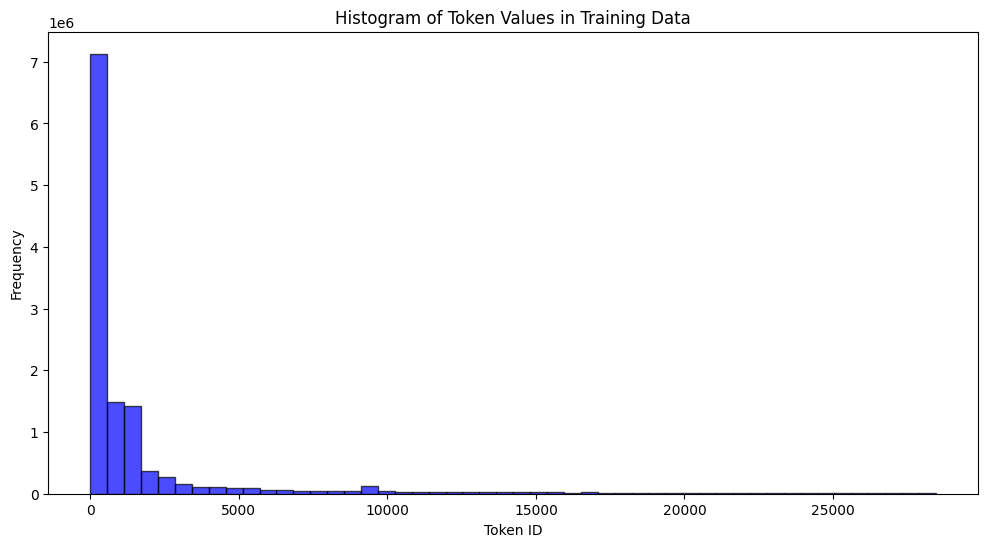

In [ ]:
# TO BE COMPLETED
# Generate histogram for training data
plt.figure(figsize=(12, 6))
plt.hist(token_ids, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Token ID")
plt.ylabel("Frequency")
plt.title("Histogram of Token Values in Training Data")
plt.show()

Top 5 Most Frequent Tokens in Training Data:
Token: [PAD] (ID: 0) - Frequency: 5587446
Token: . (ID: 119) - Frequency: 275755
Token: the (ID: 1103) - Frequency: 240615
Token: , (ID: 117) - Frequency: 226975
Token: a (ID: 170) - Frequency: 133257
Token: and (ID: 1105) - Frequency: 131270


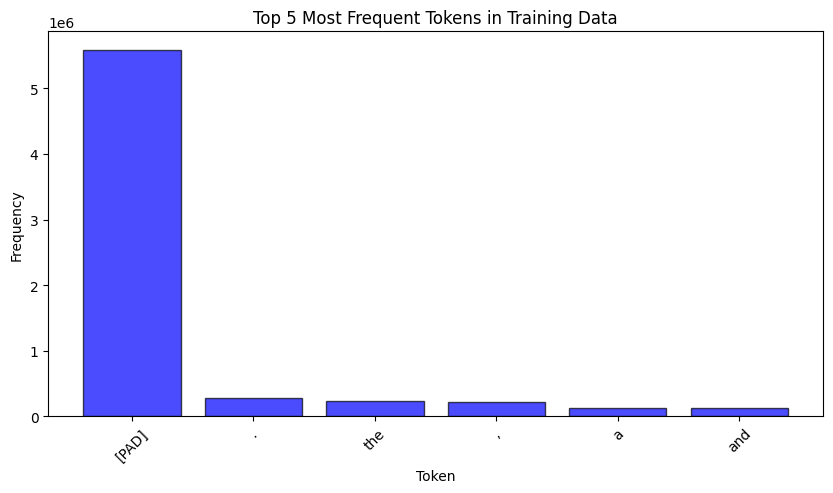

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
training_reviews = train_df['review'].tolist()
encoded_inputs = tokenizer.batch_encode_plus(
    training_reviews,
    add_special_tokens=True,  # Adds [CLS] and [SEP] tokens
    max_length=512,  # Standard BERT max length
    padding=True,  # Pads sequences to the same length
    truncation=True,  # Truncates long sequences
    return_tensors='pt'  # Returns PyTorch tensors
)

token_ids = encoded_inputs["input_ids"].cpu().numpy().flatten()
token_counts = Counter(token_ids)
top_5_tokens = token_counts.most_common(6)
top_5_tokens_with_text = [(tokenizer.convert_ids_to_tokens([t[0]])[0], t[0], t[1]) for t in top_5_tokens]

# Extract token names, IDs, and frequencies
tokens = [t[0] for t in top_5_tokens_with_text]  # Extract token names
token_ids = [t[1] for t in top_5_tokens_with_text]  # Extract token IDs
frequencies = [t[2] for t in top_5_tokens_with_text]  # Extract frequencies

# Print results
print("Top 5 Most Frequent Tokens in Training Data:")
for token_text, token_id, count in top_5_tokens_with_text:
    print(f"Token: {token_text} (ID: {token_id}) - Frequency: {count}")

# Plot histogram of top 5 tokens
plt.figure(figsize=(10, 5))
plt.bar(tokens, frequencies, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Top 5 Most Frequent Tokens in Training Data")
plt.xticks(rotation=45)
plt.show()

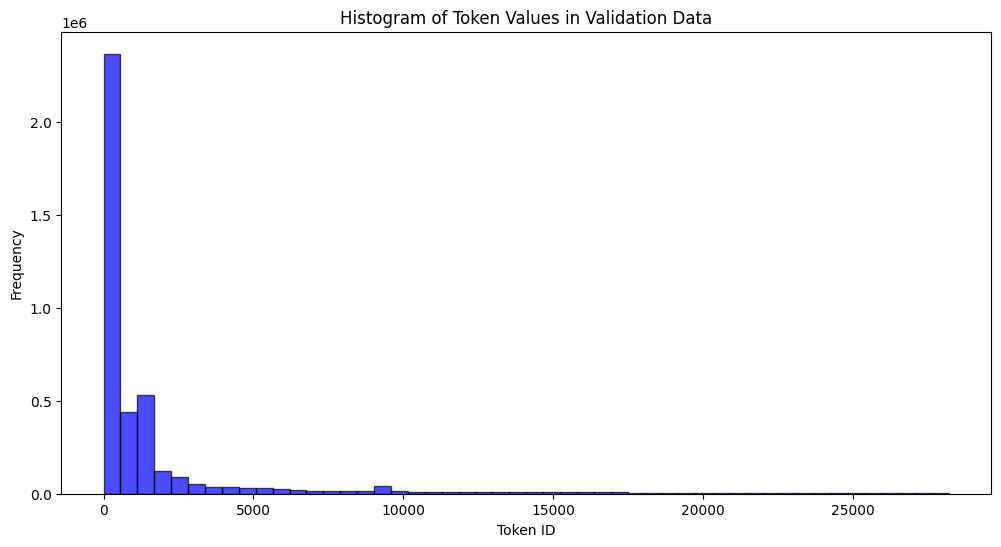

In [ ]:
import numpy as np
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

training_reviews = valid_df['review'].tolist()  # Ensure it's a list of strings

# Tokenize all reviews
encoded_inputs = tokenizer.batch_encode_plus(
    training_reviews,
    add_special_tokens=True,  # Add [CLS] and [SEP] tokens
    max_length=512,  # Set max token length
    padding=True,  # Pad sequences to the same length
    truncation=True,  # Truncate if longer than max_length
    return_tensors='pt'  # Return PyTorch tensors
)

# Extract tokenized data (Ensure it's on CPU before converting to NumPy)
input_ids = encoded_inputs["input_ids"]
token_ids = input_ids.numpy().flatten()

plt.figure(figsize=(12, 6))
plt.hist(token_ids, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Token ID")
plt.ylabel("Frequency")
plt.title("Histogram of Token Values in Validation Data")
plt.show()


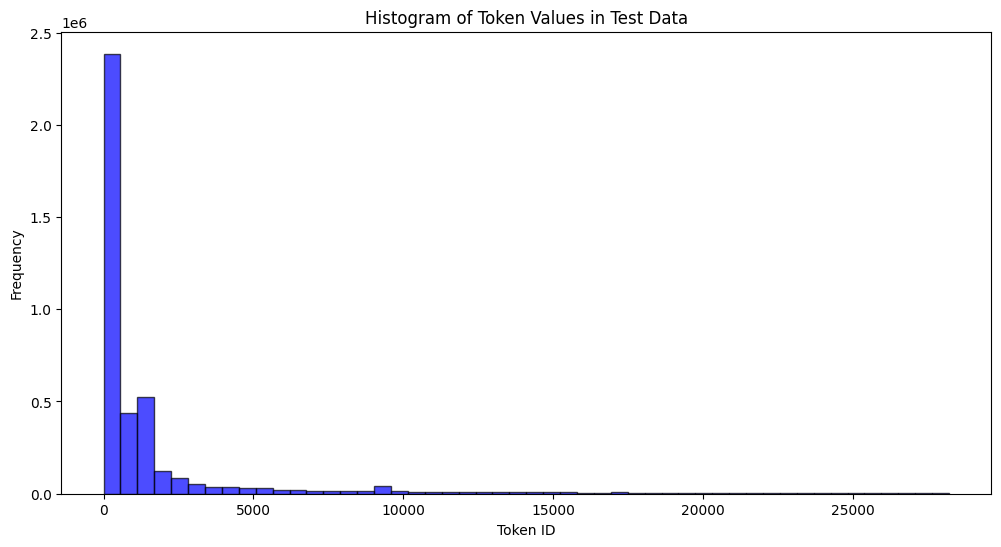

In [ ]:
import numpy as np
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

training_reviews = test_df['review'].tolist()  # Ensure it's a list of strings

# Tokenize all reviews
encoded_inputs = tokenizer.batch_encode_plus(
    training_reviews,
    add_special_tokens=True,  # Add [CLS] and [SEP] tokens
    max_length=512,  # Set max token length
    padding=True,  # Pad sequences to the same length
    truncation=True,  # Truncate if longer than max_length
    return_tensors='pt'  # Return PyTorch tensors
)

# Extract tokenized data (Ensure it's on CPU before converting to NumPy)
input_ids = encoded_inputs["input_ids"]
token_ids = input_ids.numpy().flatten()

plt.figure(figsize=(12, 6))
plt.hist(token_ids, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Token ID")
plt.ylabel("Frequency")
plt.title("Histogram of Token Values in Test Data")
plt.show()

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

The most common token is [PAD] (ID: 0) because BERT requires padding to handle variable-length inputs.
Punctuation (. and ,) ranks highly because reviews contain a lot of structured text.
Basic English words like "the", "a", and "and" are frequent because they are essential to sentence formation.
The results match expectations, showing that preprocessing steps like tokenization and padding significantly affect token frequency.

'''

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [ ]:
# TO BE COMPLETED
import torch
from transformers import BertModel, BertTokenizer

# Load the BERT model and tokenizer
bert_model = BertModel.from_pretrained("bert-base-cased")
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Select a single sample from the DataLoader
sample_text = train_df['review'].iloc[0]  # Selecting the first review
encoded_sample = tokenizer.encode_plus(
    sample_text,
    add_special_tokens=True,
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors="pt")

# Extract input IDs and attention mask
input_ids = encoded_sample["input_ids"]
attention_mask = encoded_sample["attention_mask"]

# Pass through BERT to get hidden states & pooled output
with torch.no_grad():
    outputs = bert_model(input_ids, attention_mask=attention_mask)
    hidden_states = outputs.last_hidden_state # Shape: (batch_size, seq_length, hidden_dim)
    pooled_output = outputs.pooler_output # Shape: (batch_size, hidden_dim)

# Print tensor shapes
print(f"Hidden States Shape: {hidden_states.shape}")
print(f"Pooled Output Shape: {pooled_output.shape}")

Hidden States Shape: torch.Size([1, 512, 768])
Pooled Output Shape: torch.Size([1, 768])


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

Hidden States (torch.Size([1, 512, 768]))
1 is the batch size
512 is the sequence length
768 is hidden dimension
hidden states store contextualized word representations for each token in the input sequence. Each token (word or subword) gets a 768-dimensional vector that changes depending on the context.

Pooled Output (torch.Size([1, 768]))
1 is batch size
768 is hidden size

The pooled output represents the [CLS] token embedding, which serves as a summary representation of the entire input sequence. It is commonly used for classification tasks.

'''

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.


An example is provided below in `BaselineSentimentClassifierPooled`, which you can use for inspiration. However, you should build your own model.

In [ ]:
class BaselineSentimentClassifierPooled(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierPooled, self).__init__()
        self.linear = nn.Linear(768, n_classes)

    def forward(self, pooled_embedding):
        """
        pooled_embedding: shape [batch_size, 768]
        """
        outputs = self.linear(pooled_embedding)
        return outputs

In [ ]:
class SentimentClassifierPooled(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifierPooled, self).__init__()
        self.fc1 = nn.Linear(768, 256)  # First hidden layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)  # Dropout for regularization
        self.fc2 = nn.Linear(256, n_classes)  # Output layer

    def forward(self, pooled_embedding):
        """
        pooled_embedding: shape [batch_size, 768] (from BERT)
        """
        x = self.fc1(pooled_embedding)  # First FC layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)  # Output layer
        return x  # Output logits (before softmax)

### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

An example is provided below in `BaselineSentimentClassifierLast`, which you can use for inspiration . However, you should build your own model.


In [ ]:
class BaselineSentimentClassifierLast(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierLast, self).__init__()
        # Again, no BERT directly needed if using precomputed data
        self.linear = nn.Linear(768, n_classes)


    def forward(self, last_hidden):
        """
        last_hidden: shape [batch_size, seq_len, 768]
        We'll do a simple max-pool across seq_len dimension => shape [batch_size, 768]
        """
        # last_hidden has shape [B, T, 768]
        # we want max across T => shape [B, 768]
        x, _ = torch.max(last_hidden, dim=1)
        x = self.dropout(x)
        outputs = self.linear(x)
        return outputs


In [ ]:
class SentimentClassifierLast(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifierLast, self).__init__()
        self.dropout = nn.Dropout(p=0.3)  # Dropout for regularization
        self.fc1 = nn.Linear(768, 256)  # First fully connected layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, n_classes)  # Output layer

    def forward(self, last_hidden):
        """
        last_hidden: shape [batch_size, seq_length, 768]
        We'll apply max-pooling + mean-pooling across the seq_length dimension
        to get a sentence representation of shape [batch_size, 768]
        """
        # Max pooling across sequence length
        max_pooled, _ = torch.max(last_hidden, dim=1)  # Shape: [batch_size, 768]

        # Mean pooling across sequence length
        mean_pooled = torch.mean(last_hidden, dim=1)  # Shape: [batch_size, 768]

        # Combine both pooling strategies
        x = (max_pooled + mean_pooled) / 2  # Shape: [batch_size, 768]

        # Apply dropout
        x = self.dropout(x)

        # Pass through fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)  # Output logits (before softmax)

        return x

## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data_loader, device):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """
    model.eval()  # Set model to evaluation mode
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for batch in data_loader:
            inputs, labels = batch  # Unpack batch
            inputs, labels = inputs.to(device), labels.to(device)  # Move to device

            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, dim=1)  # Get class with highest probability

            correct_predictions += (predicted == labels).sum().item()  # Count correct preds
            total_samples += labels.size(0)  # Count total samples

    accuracy = correct_predictions / total_samples  # Compute accuracy

    return accuracy

### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [ ]:
def train_model(model, train_loader, valid_loader, criterion, optimizer, device, num_epochs=10):
    model.to(device)
    train_losses, train_accuracies = [], []
    valid_losses, valid_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for batch in train_loader:
            # ✅ Use correct keys for input embeddings
            if isinstance(batch, dict):
                if "pooled_output" in batch:
                    inputs = batch["pooled_output"]  # Use pooled BERT embeddings
                elif "last_hidden" in batch:
                    inputs = batch["last_hidden"]  # Use last hidden state
                else:
                    raise KeyError(f"Unexpected keys in batch: {batch.keys()}")
                labels = batch["targets"]  # Correct labels key
            elif len(batch) >= 2:
                inputs, labels = batch[0], batch[1]
            else:
                raise ValueError(f"Unexpected batch format: {batch}")

            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, dim=1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        correct_valid, total_valid, valid_loss = 0, 0, 0.0
        with torch.no_grad():
            for batch in valid_loader:
                if isinstance(batch, dict):
                    if "pooled_output" in batch:
                        inputs = batch["pooled_output"]
                    elif "last_hidden" in batch:
                        inputs = batch["last_hidden"]
                    else:
                        raise KeyError(f"Unexpected keys in batch: {batch.keys()}")
                    labels = batch["targets"]
                elif len(batch) >= 2:
                    inputs, labels = batch[0], batch[1]
                else:
                    raise ValueError(f"Unexpected batch format: {batch}")

                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()
                _, predicted = torch.max(outputs, dim=1)
                correct_valid += (predicted == labels).sum().item()
                total_valid += labels.size(0)

        valid_loss /= len(valid_loader)
        valid_acc = correct_valid / total_valid
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

    return model


In [ ]:
# Define model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = SentimentClassifierPooled(n_classes=2) # Use the classifier model
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001) # Optimizer

# Train the model and plot training curve
trained_model = train_model(model, train_data_loader, valid_data_loader, criterion, optimizer, device, num_epochs=5)

Using device: cuda
Epoch 1/10 | Train Loss: 0.6272 | Train Acc: 0.6461 | Val Loss: 0.5780 | Val Acc: 0.7097
Epoch 2/10 | Train Loss: 0.5651 | Train Acc: 0.7101 | Val Loss: 0.5411 | Val Acc: 0.7361
Epoch 3/10 | Train Loss: 0.5367 | Train Acc: 0.7360 | Val Loss: 0.5161 | Val Acc: 0.7524
Epoch 4/10 | Train Loss: 0.5183 | Train Acc: 0.7485 | Val Loss: 0.5085 | Val Acc: 0.7605


### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
# #!pip install nbconvert

# %%shell
# jupyter nbconvert --to html /content/A4.ipynb


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**